In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as datetime
from datetime import timedelta
from datetime import datetime
import re

In [250]:
!pip install xgboost

In [71]:
data_repair_tot=pd.read_csv(r"C:\Users\jeanm\Anaconda3\envs\test\books\OpenRepair\ORDS_trp-fc-a.csv")

In [72]:
data_repair_tot.shape

(15914, 12)

In [73]:
data_repair_tot.columns


Index(['id', 'data_provider', 'country', 'language', 'product_category',
       'brand', 'model', 'year_of_manufacture', 'repair_status',
       'group_identifier', 'date', 'problem'],
      dtype='object')

- 15914 observations
- 12 columns: ID, data_provider, country, language, product_category, brand, model, year_of_manufacture, repair_status, group_identifier, date, problem

In [74]:
data_repair_tot.isnull().sum()

id                        0
data_provider             0
country                   0
language                  0
product_category          0
brand                     4
model                    10
year_of_manufacture       0
repair_status             0
group_identifier          0
date                      0
problem                2643
dtype: int64

4 missing values of "brand" (=> we remove these lines), 10 missing values of "model" (=> we remove these lines after deeper analysis?), 2643 missing values of "problem"

1. DATA ENGINEERING AND EXPLORATION
    - ID

In [75]:
data_repair_tot.groupby(by='id').count().country

id
anstiftung_1       1
anstiftung_10      1
anstiftung_100     1
anstiftung_1000    1
anstiftung_1001    1
                  ..
restart_9995       1
restart_9996       1
restart_9997       1
restart_9998       1
restart_9999       1
Name: country, Length: 15914, dtype: int64

id is unique for evey row

In [76]:
data_repair_tot.groupby(by='data_provider').count().id/data_repair_tot.shape[0]*100

data_provider
Anstiftung             18.461732
Fixit Clinic            2.155335
The Restart Project    79.382933
Name: id, dtype: float64

on the 15914 observations, 79% come from "The Restart Project", 18% from "Anstiftung", 2% from "Fixit Clinic"

In [77]:
data_country=data_repair_tot.groupby(by='country').count().sort_values(['id'], ascending=False).id
print(data_country)
print(data_country.shape)
print(data_country.iloc[0:3].sum()/data_country.sum()*100)

country
GBR    7540
DEU    2949
ITA    1182
USA     791
CAN     738
BEL     660
ARG     630
NOR     570
SWE     245
ESP     183
HKG     122
IRL     114
TUN      98
ISL      91
CHE       1
Name: id, dtype: int64
(15,)
73.33794143521428


- 15 countries participated so far to the project
- countries are represented by 3 capital letters (like GBR for Great Britain, CAN for Canada)
- the 3 main contributers are: GBR, DEU, ITA and they represent 73% of the observations
- FRANCE is not listed. Why?

In [78]:
data_language=data_repair_tot.groupby(by='language').count().sort_values(['id'], ascending=False).id
print(data_language)
print(data_language.shape)

language
English    12976
German      2938
Name: id, dtype: int64
(2,)


- Observations are either in English or in German

In [79]:
data_product=data_repair_tot.groupby(by='product_category').count().sort_values(['id'], ascending=False).id
print(data_product)
print(data_product.shape)
print(data_product.iloc[0:5].sum()/data_product.sum()*100)

product_category
Laptop                               2135
Misc                                 1619
Small kitchen item                   1561
Mobile                               1359
Lamp                                  878
Hi-Fi separates                       872
Portable radio                        766
Tablet                                531
Vacuum                                517
TV and gaming-related accessories     445
Hair & Beauty item                    430
Power tool                            419
Headphones                            374
Toy                                   368
Toaster                               345
Hi-Fi integrated                      329
PC Accessory                          308
Printer/scanner                       295
Kettle                                275
Handheld entertainment device         274
Desktop computer                      250
Small home electrical                 232
Flat screen                           214
Decorative or saf

- 35 product categories are considered and listed
- #1 is laptop
- #2 is Misc (which needs to be explored)
- #3 is small kitchen item (which is pretty vague)
- #4 is Mobile
- these 4 represent 47% of the 15914 observations

In [80]:
# we uppercase all the brand data before sorting
data_repair_tot.brand=[i.upper() if type(i)==str else i for i in data_repair_tot.brand]
data_brand=data_repair_tot.groupby(by='brand').count().sort_values(['id'], ascending=False).id
print(data_brand)
print(data_brand.shape)
print(data_brand.iloc[1:11]/data_product.sum()*100)

brand
UNKNOWN    8887
APPLE      1145
SAMSUNG     386
SONY        332
HP          244
           ... 
JCB           1
JOJO          1
JOLLA         1
JONES         1
ZYLISS        1
Name: id, Length: 1143, dtype: int64
(1143,)
brand
APPLE      7.194923
SAMSUNG    2.425537
SONY       2.086213
HP         1.533241
PHILIPS    1.263039
ASUS       0.810607
ACER       0.810607
DELL       0.798039
TOSHIBA    0.766621
BOSCH      0.728918
Name: id, dtype: float64


- the number of brands considered is gigantic: 1144
- more than 50% of the observations have no brand associated to it ("unknown")
- the first 10 brands listed is: Apple(7.2%) / Samsung(2.5%) / Sony(2%) / HP(1.5%) / Philips(1.25%) / Acer(0.8%) / Dell(0.8%) / Toshiba(0.75%) / Bosch(0.7%) / Kenwood (0.65%)
- considering the product distribution in the database, it is not a surprise to see the major laptop and mobile suppliers in the top10list

In [81]:
data_model=data_repair_tot.groupby(by='model').count().sort_values(['id'], ascending=False).id
print(data_model)
print(data_model.shape)
print("unknown is ", data_model[0]/data_repair_tot.shape[0]*100)
print(data_model[1:11]/data_repair_tot.shape[0]*100)

model
Unknown                     11497
iPhone 6                      103
Macbook Pro 2012               75
iPhone 6s                      50
Macbook                        43
                            ...  
Gelatiera                       1
Generic alarmclock              1
GibiGiana di Castiglioni        1
Glasse                          1
zg7                             1
Name: id, Length: 2899, dtype: int64
(2899,)
unknown is  72.24456453437224
model
iPhone 6            0.647229
Macbook Pro 2012    0.471283
iPhone 6s           0.314189
Macbook             0.270202
iPhone              0.263919
iPad                0.245067
iPhone 5            0.232500
MacBook Pro         0.213648
iPhone 5s           0.207365
Vaio                0.157094
Name: id, dtype: float64


- 72% of the observations are unknown models
- the first rated 10 models are almost all Apple: iPhone6 /MacbookPro2012 /iPhone6s /Macbook /iPhone /iPad /iPhone5 /MacBookPro /iPhone5s


(52,)
unknown is  16.475409836065573
count                    1220
unique                     52
top       2014-01-01 00:00:00
freq                      201
first     1929-01-01 00:00:00
last      2019-01-01 00:00:00
Name: year_of_manufacture, dtype: object


Text(0.5, 0, 'year of manufacturing of product')

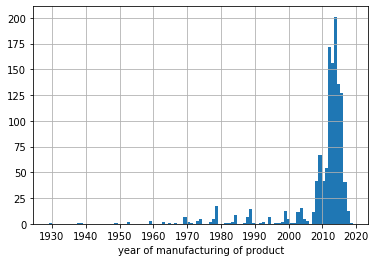

In [82]:
data_repair_tot=data_repair_tot.replace(["NA","????"," SLA-TL10"," no model number"],np.nan)
data_yearM=data_repair_tot.groupby(by='year_of_manufacture').count().sort_values(['id'], ascending=False).id
data_repair_tot.year_of_manufacture=[pd.to_datetime(i,format='%Y') for i in data_repair_tot.year_of_manufacture]
print(data_yearM.shape)
print("unknown is ",data_yearM[0]/data_yearM.sum()*100)
data_yearM=data_yearM.sort_index()
data_repair_tot.year_of_manufacture
print(data_repair_tot.year_of_manufacture.describe())
data_repair_tot.year_of_manufacture.hist(bins='auto')
plt.xlabel("year of manufacturing of product")

- the date of manufacture of the product is unknown for 92% of the observations (it is formated as "????")
- the date of manufacture format is a 4 digits year YYYY
- we clean this by replacing all other dates that are not years by "none"
- the oldest product observation is 1929???
- the distribution of years of manufacture of all observations is between 2011 and 2017

In [83]:
data_repairS=data_repair_tot.groupby(by='repair_status').count().sort_values(['id'], ascending=False).id
print(data_repairS.shape)
print(data_repairS/data_repairS.sum()*100)

(5,)
repair_status
Fixed          52.416263
Repairable     27.216741
End of life    16.301137
Unknown         4.059574
2019            0.006284
Name: id, dtype: float64


- 52% of the observations have been repaired (="Fixed")
- 27% of the observations have been stated as "Repairable"
- 16% of the observations have been considered "End Of Life"
- the 4% rest is unknown

In [84]:
data_repair_tot.date=data_repair_tot.date.replace(["REMAKE","Fixit Clinic"],"1900-01-01")
data_repair_tot.date=[datetime.strptime(i,'%Y-%m-%d') for i in data_repair_tot.date]
data_date=data_repair_tot.groupby(by='date').count().sort_values(['id'], ascending=False).id
print(data_date)
print(data_repair_tot.date.min())

date
2019-06-10    315
2019-06-09    180
2017-01-28    167
2019-06-08    151
2019-06-06    144
             ... 
2013-04-06      1
2013-04-25      1
2018-04-26      1
2013-04-27      1
2018-05-30      1
Name: id, Length: 671, dtype: int64
1900-01-01 00:00:00


- let's reformat the date column to a datetime format after removing the bad format column
- done

In [133]:
print(data_repair_tot.dtypes)
my_pattern=re.compile('[^A-Za-z]+')
data_repair_tot.loc[:,"my_problem"]=data_repair_tot.loc[:,"problem"].astype(str)
data_repair_tot.loc[:,"my_problem"]=[my_pattern.sub(' ',my_text) for my_text in data_repair_tot.loc[:,"my_problem"]]
data_repair_tot.loc[:,"my_problem"]=data_repair_tot.loc[:,"my_problem"].str.upper()
data_repair_tot.loc[:,"my_problem"].value_counts()

#exploration of the "problem" column
#data_problem=data_repair_tot.groupby(by='problem').count().sort_values(['id'], ascending=False).id
#print(data_problem.shape)
#first we ignore the german language problems (2938 observations)
# second we explore the same for German problem id
#note that there are 2943 values that have not been completed
data_problem_english= data_repair_tot[data_repair_tot.language =="English"]

#data_problem_explo[0:50]
#there are 8689 unique ENglish problems: we would like to bring them to max 10 categories
data_problem_english.loc[:,"my_problem"].value_counts().head(50)

id                             object
data_provider                  object
country                        object
language                       object
product_category               object
brand                          object
model                          object
year_of_manufacture    datetime64[ns]
repair_status                  object
group_identifier               object
date                   datetime64[ns]
problem                        object
my_problem                     object
dtype: object


NAN                                                                   2643
NOT WORKING                                                            120
 KG                                                                    107
BROKEN SCREEN                                                           80
SSD                                                                     70
CRACKED SCREEN                                                          58
BLENDER KG                                                              37
BLENDER                                                                 36
SCREEN REPLACEMENT                                                      35
IRON                                                                    28
NO POWER                                                                27
SLOW                                                                    27
LIKE ALL DATA IN Y THIS DATA IS AN ESTIMATE BASED ON PARTICIPATION      26
EXACT WEIGHT KG          

In [134]:

#lets' consider first some key words: "battery", "SSD", "screen", "cable", "slow", "RAM", "power", "charge", "connect", "LCD", "turn on"
#data_problem
problem_list_english =["WORK","STOP","BATT", "SSD", "SCREEN", "CABL", "SLOW", "RAM", "POWER", "CHARG", "CONNECT", "LCD", "TURN", "SOFT", "BOOT", "SOUND", "WATER","START", "MECH", "HEAT","SOLDER","HUMID","LIGHT",'SWITCH']
for j in range(data_problem_english.shape[0]):
    for i in range(len(problem_list)):
        if type(data_problem_english.iloc[j,data_problem_english.columns.get_loc("my_problem")]) is str:
            if problem_list_english[i] in data_problem_english.iloc[j,data_problem_english.columns.get_loc("my_problem")]:
                data_problem_english.loc[j,"problem_id"]=problem_list_english[i]
                break 
            else:
                data_problem_english.loc[j,"problem_id"]="OTHER"
        else:
            data_problem_english.loc[j,"problem_id"]="NOT MANAGED"
            break
#data_problem.columns[-1]="problem_id"

In [135]:
print(data_problem_english.groupby(by="problem_id").count().id.sort_values(ascending=False))
print(data_problem_english.problem_id.isnull().sum())

problem_id
OTHER      7087
WORK       1537
SCREEN      603
POWER       546
BATT        463
TURN        311
SWITCH      246
CHARG       232
CONNECT     232
CABL        222
SLOW        218
HEAT        177
SOUND       163
LIGHT       104
BOOT        103
START       100
MECH         94
SOFT         94
SSD          92
SOLDER       90
WATER        89
LCD          63
RAM          53
STOP         50
HUMID         7
Name: id, dtype: int64
0


- the "problem" column is a unique comment line about the observation
- a deeper NLP activity on this column helps toE provide insights on purpose in future

In [126]:
# exploration of the german problem id
data_problem_german= data_repair_tot[data_repair_tot.language =="German"]
data_problem_german.loc[:,"my_problem"].value_counts()[0:20]

DEFEKT                74
                      40
KABELBRUCH            26
OHNE FUNKTION         17
WACKELKONTAKT         15
N A                   15
FUNKTIONIERT NICHT    14
SCHALTER DEFEKT       12
L UFT NICHT           11
GEHT NICHT            11
SCHALTER KAPUTT       10
KEINE FUNKTION         9
GEHT NICHT MEHR AN     8
KAPUTT                 7
KEIN STROM             7
KABEL DEFEKT           7
AKKU DEFEKT            5
HEIZT NICHT            4
GEHT NICHT AN          4
LADEBUCHSE KAPUTT      4
Name: my_problem, dtype: int64

In [316]:
#lets' consider first some key words: "battery", "SSD", "screen", "cable", "slow", "RAM", "power", "charge", "connect", "LCD", "turn on"
#data_problem
problem_list_german=["DEFEKT","SCHALTER","KONTAKT","FUNKT","KABELBRUCH","NICHT","KAPUT","AKKU","STROM"]
problem_list_german_trslated=[]
i=0
j=0
data_problem_german["problem_id"]=np.zeros(data_problem_german.shape[0])
for j in range(data_problem_german.shape[0]):
    for i in range(len(problem_list_german)):
        if type(data_problem_german.iloc[j,data_problem_german.columns.get_loc("my_problem")]) is str:
            if problem_list_german[i] in data_problem_german.iloc[j,data_problem_german.columns.get_loc("my_problem")]:
                data_problem_german.iloc[j,data_problem_german.columns.get_loc("problem_id")]=problem_list_german[i]
                break 
            else:
                data_problem_german.iloc[j,data_problem_german.columns.get_loc("problem_id")]="OTHER"
        else:
            data_problem_german.iloc[j,data_problem_german.columns.get_loc("problem_id")]="NOT MANAGED"
            break

C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [317]:
data_problem_german.head(50)
print(data_problem_german.groupby(by="problem_id").count().id.sort_values(ascending=False))
print(data_problem_german.problem_id.isnull().sum())

problem_id
OTHER         814
NICHT         615
DEFEKT        579
FUNKT         355
KONTAKT       196
SCHALTER      170
KABELBRUCH     77
KAPUT          73
AKKU           34
STROM          25
Name: id, dtype: int64
0


In [318]:
# we can join the 2 data_problem matrices in a sole matrix
data_problem=data_problem_english.append(data_problem_german)

In [319]:
print(data_problem.shape)
data_problem.head()

(15914, 14)


,id,data_provider,country,language,product_category,brand,model,year_of_manufacture,repair_status,group_identifier,date,problem,my_problem,problem_id
0,restart_757,The Restart Project,GBR,English,Laptop,TOSHIBA,Unknown,NaT,Repairable,Restart HQ,2013-06-19,Laptop - Won't boot -,LAPTOP WON T BOOT,BOOT
1,restart_758,The Restart Project,GBR,English,Hi-Fi separates,UNKNOWN,Unknown,NaT,Fixed,Restart HQ,2013-06-19,"Radio - Buzzing, cutting out -",RADIO BUZZING CUTTING OUT,OTHER
2,restart_759,The Restart Project,GBR,English,Hi-Fi separates,UNKNOWN,Unknown,NaT,Fixed,Restart HQ,2013-06-19,CD player - No sound -,CD PLAYER NO SOUND,SOUND
3,restart_760,The Restart Project,GBR,English,TV and gaming-related accessories,UNKNOWN,Unknown,NaT,End of life,Restart HQ,2013-06-19,DVD player - No sound -,DVD PLAYER NO SOUND,SOUND
4,restart_761,The Restart Project,GBR,English,Handheld entertainment device,APPLE,Unknown,NaT,Fixed,Restart HQ,2013-06-19,Mp3 player - No power -,MP PLAYER NO POWER,POWER


In [320]:
# can we see some differences in the repair rate per defect type
#we continue working on the same data_problem
data_problem.columns
data_problem_explo=data_problem.groupby(by=["problem_id","repair_status"]).count().id.unstack()
data_problem_explo=data_problem_explo.drop(["2019"], axis=1)
data_problem_explo.loc[:,"total"]=data_problem_explo.iloc[:,0:3].sum(1)
data_problem_explo.loc[:, "repair_rate"]=round(data_problem_explo.loc[:,"Fixed"]/data_problem_explo.loc[:,"total"]*100,1)
data_problem_explo.loc[:, "dead_rate"]=round(data_problem_explo.loc[:,"End of life"]/data_problem_explo.loc[:,"total"]*100,1)
data_problem_explo.sort_values(by="dead_rate", ascending=False)

repair_status,End of life,Fixed,Repairable,Unknown,total,repair_rate,dead_rate
problem_id,,,,,,,
HUMID,3.0,1.0,3.0,NaN,7.0,14.3,42.9
WATER,36.0,26.0,26.0,1.0,88.0,29.5,40.9
HEAT,59.0,64.0,51.0,3.0,174.0,36.8,33.9
MECH,27.0,45.0,22.0,NaN,94.0,47.9,28.7
STOP,13.0,25.0,11.0,1.0,49.0,51.0,26.5
POWER,142.0,219.0,184.0,1.0,545.0,40.2,26.1
BOOT,26.0,41.0,36.0,NaN,103.0,39.8,25.2
TURN,73.0,95.0,138.0,5.0,306.0,31.0,23.9
SOUND,34.0,76.0,50.0,3.0,160.0,47.5,21.2


<function matplotlib.pyplot.show(*args, **kw)>

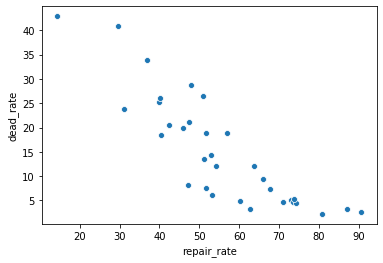

In [321]:
sns.scatterplot(x="repair_rate",y="dead_rate",data=data_problem_explo)
plt.show

In [341]:
#ML pipeline to predict if it can be repared
data_problem.columns
#we drop the not useful columns
data_problem_ML=data_problem.drop(["id", "data_provider","model","group_identifier","problem","my_problem"], axis=1)
data_problem_ML.dtypes

#we create an age column
data_problem_ML['age']=(data_problem_ML.date-data_problem_ML.year_of_manufacture)
data_problem_ML['age']=round(data_problem_ML['age']/np.timedelta64(1,'Y'),0)
data_problem_ML['age']=[0 if i<0 else i for i in data_problem_ML['age']]
print(data_problem_ML['age'].median())
#data_problem_ML.dtypes
#data_problem_ML.groupby(by='problem_id').mean().age.sort_values(ascending=False)
#12169 data have no age, we replace by mean age = 4.5
#print(data_problem_ML.age.head(50))
data_problem_ML.fillna(value={'age':5.0}, inplace = True)
data_problem_ML.groupby(by="age").count().sort_values(by="brand", ascending=False)
#we can drop "year of manufacture column"
data_problem_ML=data_problem_ML.drop(["year_of_manufacture"], axis=1)

5.0


In [342]:
#we continue ML pipeline data preparation with selection of categories
data_problem_ML.columns
data_problem_ML_cat=data_problem_ML.groupby(by="product_category").count().sort_values(by="brand", ascending=False)

#we drop categories where there are less than 20 observations
list_cat=data_problem_ML_cat[data_problem_ML_cat["brand"]>10].index.to_list()
print(list_cat)
data_problem_ML_2=data_problem_ML[~data_problem_ML.brand.isin(list_cat)]
data_problem_ML_2.groupby(by="product_category").count().sort_values(by="brand", ascending=False)
#does not work but we continue

['Laptop', 'Misc', 'Small kitchen item', 'Mobile', 'Lamp', 'Hi-Fi separates', 'Portable radio', 'Tablet', 'Vacuum', 'TV and gaming-related accessories', 'Hair & Beauty item', 'Power tool', 'Headphones', 'Toy', 'Toaster', 'Hi-Fi integrated', 'PC Accessory', 'Printer/scanner', 'Kettle', 'Handheld entertainment device', 'Desktop computer', 'Small home electrical', 'Flat screen', 'Decorative or safety lights', 'Digital Compact Camera', 'Fan', 'DLSR / Video Camera', 'Musical instrument', 'Sewing machine', 'Watch/clock', 'Paper shredder', 'Aircon/Dehumidifier', 'Large home electrical', 'Projector', 'Battery/charger/adapter']


,country,language,brand,repair_status,date,problem_id,age
product_category,,,,,,,
Laptop,2135,2135,2135,2135,2135,2135,2135
Misc,1619,1619,1619,1619,1619,1619,1619
Small kitchen item,1561,1561,1561,1561,1561,1561,1561
Mobile,1359,1359,1359,1358,1359,1359,1359
Lamp,878,878,874,878,878,878,878
Hi-Fi separates,872,872,872,872,872,872,872
Portable radio,766,766,766,766,766,766,766
Tablet,531,531,531,531,531,531,531
Vacuum,517,517,517,517,517,517,517


In [343]:
# what is the status of the data_problem_ML database
data_problem_ML.dtypes
#we convert date to year
data_problem_ML["repar_year"]=[my_date.year for my_date in data_problem_ML["date"]]

#we drop date column
data_problem_ML=data_problem_ML.drop("date", axis=1)
data_problem_ML.dtypes

country              object
language             object
product_category     object
brand                object
repair_status        object
problem_id           object
age                 float64
repar_year            int64
dtype: object

In [344]:
#we split the repair status as a 2 states cat column: fixed or not_fixed
data_problem_ML.loc[:,"fixed"]=[1 if my_repair_state=="Fixed" else 0 for my_repair_state in data_problem_ML.repair_status]
data_problem_ML=data_problem_ML.drop("repair_status", axis=1)

In [345]:
#we drop the lines where the problem_id is "other" and "not managed"
#data_problem_ML=data_problem_ML[data_problem_ML.problem_id != "OTHER"]
#data_problem_ML=data_problem_ML[data_problem_ML.problem_id != "NOT MANAGED"]

In [346]:
#we clean the brand column
#we drop all brands who have less than 10 occurence

In [347]:
#We import the appropriate packages
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

SEED=222

In [348]:
print(data_problem_ML.columns)
data_problem_ML.shape

Index(['country', 'language', 'product_category', 'brand', 'problem_id', 'age',
       'repar_year', 'fixed'],
      dtype='object')


(15914, 8)

In [349]:
data_problem_ML["product_category"]=pd.Categorical(data_problem_ML["product_category"])
data_problem_ML["product_category_label"]=data_problem_ML["product_category"].cat.codes
data_problem_ML["brand"]=pd.Categorical(data_problem_ML["brand"])
data_problem_ML["brand_label"]=data_problem_ML["brand"].cat.codes
data_problem_ML["problem_id"]=pd.Categorical(data_problem_ML["problem_id"])
data_problem_ML["problem_id_label"]=data_problem_ML["problem_id"].cat.codes
data_problem_ML["language"]=pd.Categorical(data_problem_ML["language"])
data_problem_ML["language_label"]=data_problem_ML["language"].cat.codes
data_problem_ML["country"]=pd.Categorical(data_problem_ML["country"])
data_problem_ML["country_label"]=data_problem_ML["country"].cat.codes
data_problem_ML["age"]=pd.Categorical(data_problem_ML["age"])
data_problem_ML["age_label"]=data_problem_ML["age"].cat.codes

In [350]:
# we create combination columns
# column1: combination of age and brand
data_problem_ML['comb_age_brand']=(data_problem_ML['age_label']+1)*(data_problem_ML['brand_label']+1)
# column2: combination of product_category and age
data_problem_ML['comb_cat_age']=(data_problem_ML['age_label']+1)*(data_problem_ML['product_category_label']+1)
# column3: combination of brand and problem_id
data_problem_ML['comb_brand_pbid']=(data_problem_ML['problem_id_label']+1)*(data_problem_ML['brand_label']+1)
#column_4: combination of age and problem_id
data_problem_ML['comb_age_pbid']=(data_problem_ML['problem_id_label']+1)*(data_problem_ML['age_label']+1)
# column5: combination of cat and brand
data_problem_ML['comb_cat_brand']=(data_problem_ML['product_category_label']+1)*(data_problem_ML['brand_label']+1)
# column6: age category column
data_problem_ML['comb_cat_brand']=(data_problem_ML['product_category_label']+1)*(data_problem_ML['brand_label']+1)

In [351]:
# we drop the first not cat columns
data_problem_ML_2=data_problem_ML.drop(columns=["product_category","brand","problem_id","country","language","age"])

data_problem_ML_2.dtypes
data_problem_ML_2.shape

(15914, 13)

In [352]:
for i in data_problem_ML_2.columns:
    counts = data_problem_ML_2.loc[:,i].value_counts().to_dict()
    data_problem_ML_2[''+i+'_counts'] = data_problem_ML_2.loc[:,i].map(counts)

In [353]:
data_problem_ML_2.columns
data_problem_ML_2.shape

(15914, 26)

In [354]:
# we drop the lines where value counts of brand_label is below 10
data_problem_ML_2=data_problem_ML_2[data_problem_ML_2.brand_label_counts>5]
data_problem_ML_2.min()

repar_year                        1900
fixed                                0
product_category_label               0
brand_label                          7
problem_id_label                     0
language_label                       0
country_label                        0
age_label                            0
comb_age_brand                  -32668
comb_cat_age                      -128
comb_brand_pbid                 -32386
comb_age_pbid                     -128
comb_cat_brand                  -32426
repar_year_counts                    2
fixed_counts                      7573
product_category_label_counts       26
brand_label_counts                   6
problem_id_label_counts              7
language_label_counts             2938
country_label_counts                 1
age_label_counts                     1
comb_age_brand_counts                1
comb_cat_age_counts                  1
comb_brand_pbid_counts               1
comb_age_pbid_counts                 1
comb_cat_brand_counts    

In [355]:
#let's build the train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_good=data_problem_ML_2
X=train_good.drop(['fixed','fixed_counts'],axis=1)
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X.values)
#print(X.columns)
print(X_scale.shape)
Y=le.fit_transform(train_good['fixed'])
print(Y.shape)
X_train,X_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.1,random_state=2012)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
print(y_test.dtype)

(14440, 24)
(14440,)
(12996, 24) (1444, 24) (12996,) (1444,)
int64


In [356]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

gb = GradientBoostingClassifier(n_estimators=400, random_state=2018)
rf = RandomForestClassifier(n_estimators=100, max_depth=7,min_samples_split=2,random_state=2012)
knn = KNeighborsClassifier(n_neighbors=100,weights='distance')
nn = MLPClassifier((50,50,50),early_stopping=False, max_iter=200, random_state=2010, solver="lbfgs")
svm = SVC(kernel='rbf',probability=True,random_state=42)
clf=MultinomialNB()
xgbc=XGBClassifier(n_estimators=46, max_depth=3, booster='gbtree')

Results = pd.DataFrame({'Model': [],'Accuracy Score': []})

gb.fit(X_train, y_train)
Y_pred= gb.predict(X_test)
res = pd.DataFrame({"Model":['GradientBoostingClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

rf.fit(X_train, y_train)
Y_pred= rf.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

knn.fit(X_train, y_train)
Y_pred= knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

nn.fit(X_train, y_train)
Y_pred= nn.predict(X_test)
res = pd.DataFrame({"Model":['NeuralNetwork'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

svm.fit(X_train, y_train)
Y_pred= svm.predict(X_test)
res = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)
res = pd.DataFrame({"Model":['Naive Bayes'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

xgbc.fit(X_train, y_train)
Y_pred= xgbc.predict(X_test)
res = pd.DataFrame({"Model":['X Gradient Boost'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

Results.sort_values(by='Accuracy Score', ascending=False)

C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Model,Accuracy Score
0,GradientBoostingClassifier,0.630194
0,RandomForestClassifier,0.609418
0,KNeighborsClassifier,0.604571
0,X Gradient Boost,0.596953
0,NeuralNetwork,0.585180
0,Naive Bayes,0.550554
0,SVC,0.543629


<function matplotlib.pyplot.show(*args, **kw)>

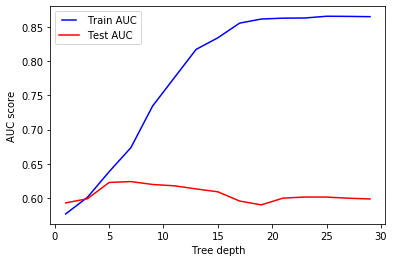

In [238]:
#depths exploration of the random forrest classifier
max_depths = np.arange(1,30,2)
train_results = []
test_results = []
for max_depth in max_depths:
   rf_opt = RandomForestClassifier(n_estimators=10, max_depth=max_depth, n_jobs=-1, min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

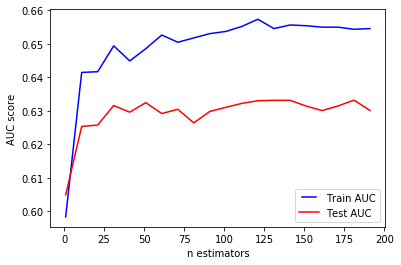

In [239]:
max_estimators = np.arange(1, 200,10)
train_results = []
test_results = []
for max_estim in max_estimators:
   rf_opt = RandomForestClassifier(n_estimators=max_estim, max_depth=5, n_jobs=-1,min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n estimators')
plt.show

In [359]:
data_problem_ML_2.loc[:,"predicted"]=gb.predict(X_scale)
print(data_problem_ML_2.groupby(by="predicted").count().reset_index().iloc[:,1])
print(data_problem_ML_2.groupby(by="fixed").count().reset_index().iloc[:,1])
data_problem_ML_2.loc[:,'good_prediction']=[1 if data_problem_ML_2.iloc[i,data_problem_ML_2.columns.get_loc('predicted')]==data_problem_ML_2.iloc[i,data_problem_ML_2.columns.get_loc('fixed')] else 0 for i in range(data_problem_ML_2.shape[0])]
data_problem_ML_2.loc[:,'good_prediction'].value_counts()
print(data_problem_ML_2.loc[:,'good_prediction'].value_counts()[1]/data_problem_ML_2.loc[:,'good_prediction'].value_counts().sum())

0    6753
1    7687
Name: repar_year, dtype: int64
0    6829
1    7611
Name: repar_year, dtype: int64
0.6685595567867036


In [360]:
#let's try to do it with multiclass logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.5734072022160664
0.5554016620498615


C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [188]:
X.columns

Index(['age', 'repar_year', 'product_category_label', 'brand_label',
       'problem_id_label', 'age_counts', 'repar_year_counts',
       'product_category_label_counts', 'brand_label_counts',
       'problem_id_label_counts'],
      dtype='object')

In [189]:
data_group=data_repair_tot.groupby(by='group_identifier').count().sort_values(['id'], ascending=False).id
print(data_group)

group_identifier
Restart HQ                  1575
Hackney Fixers              1223
repaircafe-dresden          1210
RéparothonsINSERTECH (Mo     738
Club de Reparadores          630
                            ... 
repair-cafe-wf                 1
Repair Café Herzele            1
Repair Café Haacht             1
Restarters Romandie            1
tomstest-reparaturcafe         1
Name: id, Length: 112, dtype: int64


- the "group_identifier" identifies the repair cafe where the repair is made

++focus on MOBILE PHONES++

In [190]:
data_repair_tot.brand=data_repair_tot.brand.apply(str)
data_repair_tot.brand=[i.upper() for i in data_repair_tot.brand]
data_mobile=data_repair_tot[data_repair_tot.product_category=="Mobile"]
data_mobile=data_mobile.groupby(by=["brand","repair_status"]).count().id
data_mobile=data_mobile.unstack()
data_mobile['fixing_rate_pc']=data_mobile.Fixed/data_mobile.sum(1)*100
data_mobile['total_items']=data_mobile.iloc[:,0:4].sum(1)
data_mobile=data_mobile[data_mobile['Fixed']>5]
data_mobile=data_mobile.sort_values('total_items',ascending=False)
data_mobile

repair_status,End of life,Fixed,Repairable,Unknown,fixing_rate_pc,total_items
brand,,,,,,
APPLE,38.0,348.0,174.0,5.0,61.592920,565.0
UNKNOWN,66.0,169.0,106.0,3.0,49.127907,344.0
SAMSUNG,33.0,59.0,107.0,NaN,29.648241,199.0
SONY,3.0,19.0,18.0,1.0,46.341463,41.0
NOKIA,3.0,12.0,15.0,NaN,40.000000,30.0
MOTOROLA,5.0,9.0,13.0,1.0,32.142857,28.0
FAIRPHONE,1.0,10.0,11.0,NaN,45.454545,22.0
HTC,3.0,7.0,5.0,2.0,41.176471,17.0
HUAWEI,2.0,7.0,5.0,NaN,50.000000,14.0


In [191]:
data_repair_tot.model=[i.upper() if type(i)==str else i for i in data_repair_tot.model ]
data_iPhone=data_repair_tot[data_repair_tot.model.str.contains("iPhone|IPHONE|iphone")==True]
data_mobile_Apple=data_repair_tot[data_repair_tot.brand=="APPLE"]
data_mobile_Apple=data_mobile_Apple[data_mobile_Apple.product_category=="Mobile"]
print(data_iPhone.shape, data_mobile_Apple.shape)
#data_iPhone['age_when_repared']=divmod(data_iPhone.date-data_iPhone.year_of_manufacture, 86400)

(476, 12) (565, 12)


we are missing some Apple phones in the data_iPhone, let's correct

In [192]:

#there are 73 different names used for Apple Phones??? strange... lets do better
#42 are "UNKNOWN" => lets just call them iPhone
data_mobile_Apple['model_clean']=["IPHONE" if i=="UNKNOWN" else i for i in data_mobile_Apple.model]
#data_mobile_Apple['model_clean']=["iPhone "+i if ("iPhone|IPHONE|iphone") not in i else i for i in data_mobile_Apple.model_clean]
#there is still 73 types of iPhone listed whereas onnly 24 types have been produced
# we can also remove all "spaces" between words
# we will clean later

3.726291436511359 1.6224290383980629


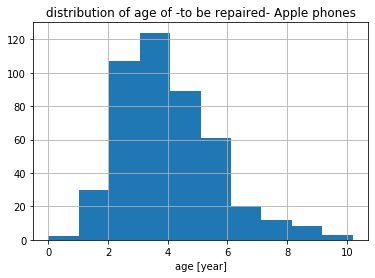

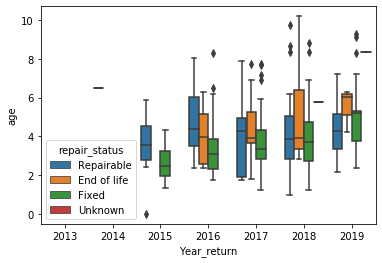

In [193]:
data_mobile_Apple['age']=(data_mobile_Apple.date-data_mobile_Apple.year_of_manufacture)
data_mobile_Apple['age']=data_mobile_Apple['age']/np.timedelta64(1,'Y')
data_mobile_Apple['age']=[0 if i<0 else i for i in data_mobile_Apple['age']]
plt.figure(1)
data_mobile_Apple['age'].hist(bins=10)
print(data_mobile_Apple['age'].median(),data_mobile_Apple['age'].std())
plt.xlabel('age [year]')
plt.title('distribution of age of -to be repaired- Apple phones')
data_mobile_Apple['age'].isnull().sum()
data_mobile_Apple['Year_return']=[i.year for i in data_mobile_Apple.date]
data_mobile_Apple['Year_return'].head()
plt.figure(2)
sns.boxplot(x='Year_return', y='age', hue= 'repair_status',data= data_mobile_Apple)

In [194]:
data_mobile_samsung=data_repair_tot[data_repair_tot.brand=="SAMSUNG"]
data_mobile_samsung=data_mobile_samsung[data_mobile_samsung.product_category=="Mobile"]
print(data_mobile_samsung.shape)

(199, 12)


3.8919348104341633 1.3108287981106639


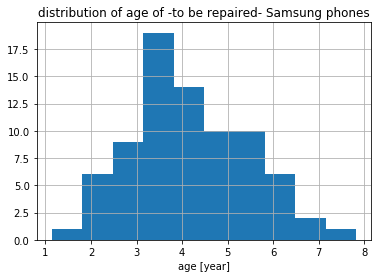

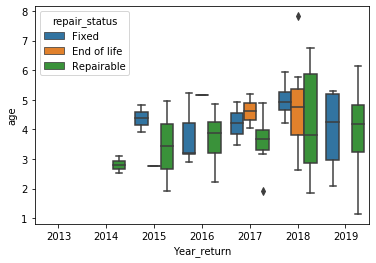

In [195]:
data_mobile_samsung['age']=(data_mobile_samsung.date-data_mobile_samsung.year_of_manufacture)
data_mobile_samsung['age']=data_mobile_samsung['age']/np.timedelta64(1,'Y')
data_mobile_samsung['age']=[0 if i<0 else i for i in data_mobile_samsung['age']]
plt.figure(1)
data_mobile_samsung['age'].hist(bins=10)
print(data_mobile_samsung['age'].median(),data_mobile_samsung['age'].std())
plt.xlabel('age [year]')
plt.title('distribution of age of -to be repaired- Samsung phones')
data_mobile_samsung['age'].isnull().sum()
data_mobile_samsung['Year_return']=[i.year for i in data_mobile_samsung.date]
data_mobile_samsung['Year_return'].head()
plt.figure(2)
sns.boxplot(x='Year_return', y='age', hue= 'repair_status',data= data_mobile_samsung)

** focus on laptop **

4.397078653223543


C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'number of repairs')

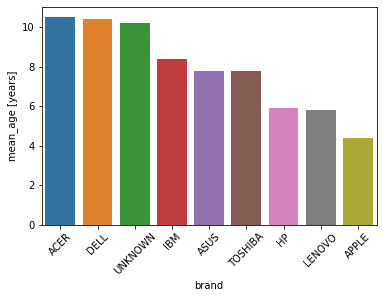

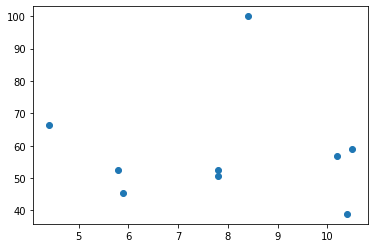

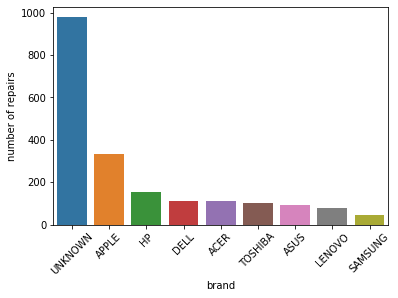

In [196]:
data_laptop=data_repair_tot[data_repair_tot.product_category=="Laptop"]
data_laptop['age']=(data_laptop.date-data_laptop.year_of_manufacture)
data_laptop['age']=data_laptop['age']/np.timedelta64(1,'Y')
print(data_laptop['age'].median())
mean_age=data_laptop.groupby(by='brand').median().age
mean_age=round(mean_age,1)
data_laptop=data_laptop.groupby(by=["brand","repair_status"]).count().id
data_laptop=data_laptop.unstack()
data_laptop['fixing_rate_pc']=data_laptop.Fixed/data_laptop.sum(1)*100
data_laptop['total_items']=round(data_laptop.iloc[:,0:4].sum(1))
data_laptop['mean_age']=mean_age
data_laptop=data_laptop[data_laptop['Fixed']>5]
data_laptop=data_laptop.sort_values('mean_age',ascending=False)
data_laptop=data_laptop.reset_index()
#print(data_laptop)
g=sns.barplot(x='brand',y='mean_age', data=data_laptop[0:9])
g.set_xticklabels(data_laptop.brand,rotation=45)
g.set_ylabel('mean_age [years]')
plt.figure(2)
plt.scatter(data_laptop['mean_age'],data_laptop['fixing_rate_pc'])
data_laptop=data_laptop.sort_values('total_items',ascending=False)
plt.figure(3)
g=sns.barplot(x='brand',y='total_items', data=data_laptop[0:9])
g.set_xticklabels(data_laptop.brand,rotation=45)
g.set_ylabel('number of repairs')

4.397078653223543 1.5908332038861601


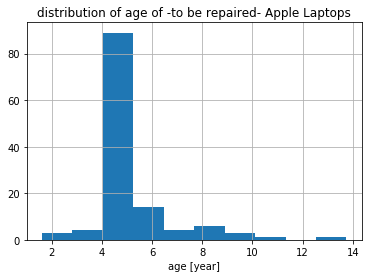

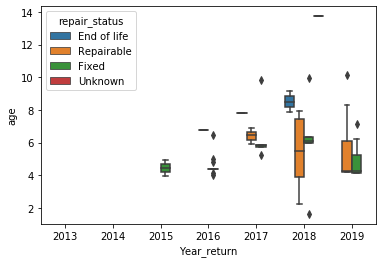

In [197]:
data_laptop_Apple=data_repair_tot[data_repair_tot.brand=="APPLE"]
data_laptop_Apple=data_laptop_Apple[data_laptop_Apple.product_category=="Laptop"]
data_laptop_Apple['age']=(data_laptop_Apple.date-data_laptop_Apple.year_of_manufacture)
data_laptop_Apple['age']=data_laptop_Apple['age']/np.timedelta64(1,'Y')
data_laptop_Apple['age']=[0 if i<0 else i for i in data_laptop_Apple['age']]
plt.figure(1)
data_laptop_Apple['age'].hist(bins=10)
print(data_laptop_Apple['age'].median(),data_laptop_Apple['age'].std())
plt.xlabel('age [year]')
plt.title('distribution of age of -to be repaired- Apple Laptops')
data_laptop_Apple['age'].isnull().sum()
data_laptop_Apple['Year_return']=[i.year for i in data_laptop_Apple.date]
data_laptop_Apple['Year_return'].head()
plt.figure(2)
sns.boxplot(x='Year_return', y='age', hue= 'repair_status',data= data_laptop_Apple)

Text(0.5, 1.0, 'a linear increase of Mobile repairs')

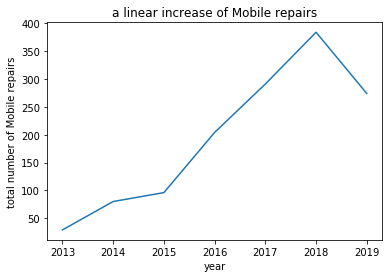

In [198]:
data_repair_tot=pd.read_csv(r"C:\Users\jeanm\Anaconda3\envs\test\books\OpenRepair\ORDS_trp-fc-a.csv")
data_repair_tot.date=data_repair_tot.date.replace(["REMAKE","Fixit Clinic"],"1900-01-01")
data_repair_tot.date=[datetime.strptime(i,'%Y-%m-%d') for i in data_repair_tot.date]
data_repair_tot.brand=data_repair_tot.brand.apply(str)
data_repair_tot.brand=[i.upper() for i in data_repair_tot.brand]
#show the growth of repairs global
data_repair_tot['Year']=[i.year for i in data_repair_tot.date]
data_repair_tot=data_repair_tot[data_repair_tot.product_category=='Mobile']
data_year=data_repair_tot.groupby(by='Year').count().reset_index()
#print(data_year)
plt.plot(data_year['Year'].iloc[1:],data_year['id'].iloc[1:])
plt.xlabel('year')
plt.ylabel('total number of Mobile repairs')
plt.title('a linear increase of Mobile repairs')

In [199]:
data_repair_tot=pd.read_csv(r"C:\Users\jeanm\Anaconda3\envs\test\books\OpenRepair\ORDS_trp-fc-a.csv")
data_repair_tot.date=data_repair_tot.date.replace(["REMAKE","Fixit Clinic"],"1900-01-01")
data_repair_tot.date=[datetime.strptime(i,'%Y-%m-%d') for i in data_repair_tot.date]
data_repair_tot_Laptop=data_repair_tot[data_repair_tot.product_category=='Laptop']
data_repair_tot_Laptop=data_repair_tot_Laptop[data_repair_tot_Laptop.brand=='APPLE']
#data_repair_tot_Laptop=data_repair_tot_Laptop[data_repair_tot_Laptop.repair_status==('Repairable')]
print(data_repair_tot_Laptop.shape)
data_repair_tot_Laptop['age']=(data_repair_tot_Laptop.date-data_repair_tot_Laptop.year_of_manufacture)
data_repair_tot_Laptop['age']=data_repair_tot_Laptop['age']/np.timedelta64(1,'Y')
print(data_repair_tot_Laptop.shape)
data_Laptop_APPLE_fixed=data_repair_tot_Laptop.groupby('problem') \
       .agg({'problem':'count','Year':'mean','age':'mean'}) \
       .rename(columns={'problem':'count','Year':'mean_year','age':'mean_age'}) \
       .reset_index()
data_Laptop_APPLE_fixed=data_Laptop_APPLE_fixed.sort_values('count',ascending=False)
print(data_Laptop_APPLE_fixed[0:30])

(0, 12)


TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('O')

In [ ]:
data_repair_tot_Mobile=data_repair_tot[data_repair_tot.product_category=='Mobile']
data_repair_tot_Mobile=data_repair_tot_Mobile[data_repair_tot_Mobile.brand=='APPLE']
data_repair_tot_Mobile.problem=data_repair_tot_Mobile.problem.apply(str)
data_repair_tot_Mobile.problem=[i.upper() for i in data_repair_tot_Mobile.problem]
try:
    data_repair_tot_Mobile["problem_screen"]=data_repair_tot_Mobile.problem.str.contains("SCREEN")
#data_repair_tot_Mobile=data_repair_tot_Mobile[data_repair_tot_Mobile.repair_status==('Fixed')]
    print(data_repair_tot_Mobile.shape)
    data_Mobile_APPLE_fixed=data_repair_tot_Mobile.groupby('problem_screen').count()
    print(data_Mobile_APPLE_fixed.id[0:10])
except :
    print("error")

In [ ]:
# small kitchen items exploration
data_repair_tot_SKI=data_repair_tot[data_repair_tot.product_category=='Small kitchen item']
data_repair_tot_SKI_summary=data_repair_tot_SKI.groupby(by='brand').count().reset_index()
data_repair_tot_SKI_summary=data_repair_tot_SKI_summary.sort_values(by='id',ascending=False)
#print(data_repair_tot_toaster_summary.head())
plt.figure(1)
g=sns.barplot(x='brand',y='id', data=data_repair_tot_SKI_summary[1:30])
g.set_xticklabels(data_repair_tot_SKI_summary.brand[1:30],rotation=90)
g.set_ylabel('number of repairs')
g.set_title("number of repairs of small kitchen items")
data_repair_tot_SKI_KW=data_repair_tot_SKI[data_repair_tot_SKI.brand=='Kenwood']
#print(data_repair_tot_SKI_KW.groupby(by='model').count())